Домашнее задание LIGHT
На входе датасет Бостон из ячейки [Трансформация таргета (целевой переменной]:

Использовать различные преобразования данных для датасета Бостон, с целью уменьшения средней абсолютной ошибки (MAE) на тестовой части при использовании линейной регрессии (ячейки для запуска см. выше)

Составить таблицу, где зафиксировать преобразования и значение метрики

Описать выводы, к которым Вы пришли.

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer, quantile_transform
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

# CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# TAX: Full-value property tax rate per $10,000
# PTRATIO: Pupil-teacher ratio by town
# B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
# LSTAT: Percentage of lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s

dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target
df.head()

# target = np.array(dataset.feature_names) == "DIS"

# X = dataset.data[:, np.logical_not(target)]
# y = dataset.data[:, target].squeeze()
# y_trans = QuantileTransformer(output_distribution='normal').fit_transform(dataset.data[:, target])




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [121]:
for c in df.columns:
  print(c,len(np.unique(df[c])))

CRIM 504
ZN 26
INDUS 76
CHAS 2
NOX 81
RM 446
AGE 356
DIS 412
RAD 9
TAX 66
PTRATIO 46
B 357
LSTAT 455
MEDV 229


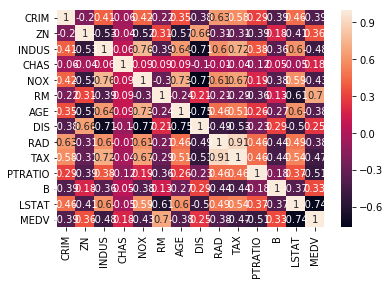

In [24]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [31]:
correlation_matrix['MEDV']

CRIM      -0.39
ZN         0.36
INDUS     -0.48
CHAS       0.18
NOX       -0.43
RM         0.70
AGE       -0.38
DIS        0.25
RAD       -0.38
TAX       -0.47
PTRATIO   -0.51
B          0.33
LSTAT     -0.74
MEDV       1.00
Name: MEDV, dtype: float64

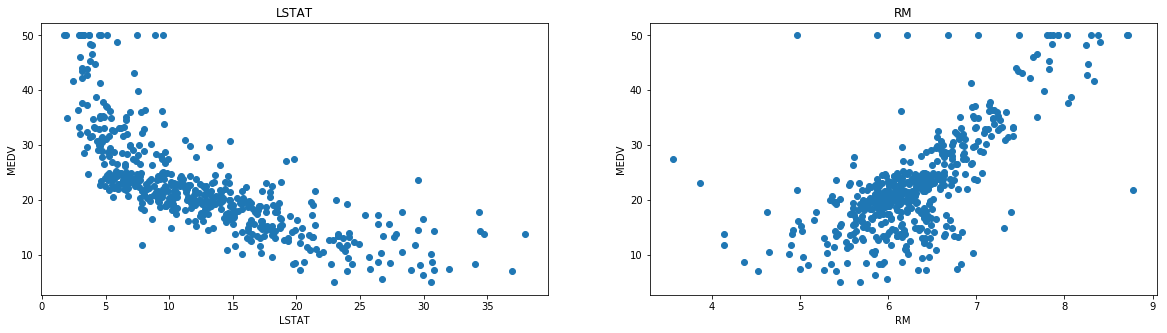

In [2]:
plt.figure(figsize=(20, 5))

features =  ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

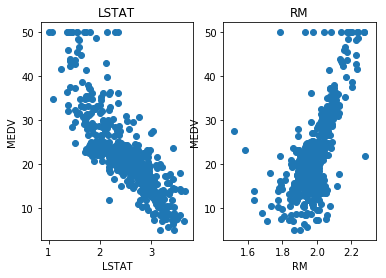

In [3]:
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = np.log1p(df[col])
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

#LinearRegression

In [82]:
from sklearn.model_selection import train_test_split

X = df.loc[:,['LSTAT','RM']]
Y = df['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
import warnings 
warnings.filterwarnings('ignore')

def regression(X_train, Y_train, X_test, Y_test):
  model = LinearRegression()
  model.fit(X_train, Y_train)
  # model evaluation for training set
  y_train_predict = model.predict(X_train)
  mae = (mean_absolute_error(Y_train, y_train_predict))
  print('train',mae)

  y_test_predict = model.predict(X_test)
  mae = (mean_absolute_error(Y_test, y_test_predict))
  print('test',mae)  


##Baseline mae

In [47]:
regression(X_train, Y_train, X_test, Y_test)

train 4.031115615178024
test 3.7913102133431047


#log1p

In [48]:
regression(np.log1p(X_train), Y_train, np.log1p(X_test), Y_test)

train 3.8174309141580696
test 3.6463094220383354


In [0]:
def mae_test(X_train, Y_train, X_test, Y_test, transformer):
  transformer.fit(X_train)
  X_trans_train = transformer.transform(X_train)
  X_trans_test = transformer.transform(X_test)

  regression(X_trans_train, Y_train, X_trans_test, Y_test)
  
def mae_test_inverse(X_train, Y_train, X_test, Y_test, transformer):
  q_trans = QuantileTransformer(output_distribution='normal')
  q_trans.fit(Y_train.values.reshape(-1, 1))

  y_trans_train = q_trans.transform(Y_train.values.reshape(-1, 1))
  y_trans_test = q_trans.transform(Y_test.values.reshape(-1, 1))  
  
  transformer.fit(X_train)
  X_trans_train = transformer.transform(X_train)
  X_trans_test = transformer.transform(X_test)

  model = LinearRegression()
  model.fit(X_trans_train, y_trans_train)

  y_train_predict = model.predict(X_trans_train)

  mae = (mean_absolute_error(Y_train, q_trans.inverse_transform(y_train_predict)))
  print('train',mae)

  y_test_predict = model.predict(X_trans_test)
  mae = (mean_absolute_error(Y_test, q_trans.inverse_transform(y_test_predict)))
  print('test',mae) 
  


#трансформация таргета 

In [0]:
Y_train.values

In [0]:
trans = QuantileTransformer(output_distribution='normal')
trans.fit(Y_train.values.reshape(-1, 1))

y_train_trans = trans.transform(Y_train.values.reshape(-1, 1))
y_test_trans = trans.transform(Y_test.values.reshape(-1, 1))

In [52]:

model = LinearRegression()
model.fit(X_train, y_train_trans)

y_train_predict = model.predict(X_train)
mae = (mean_absolute_error(Y_train, trans.inverse_transform(y_train_predict)))
print('train',mae)

y_test_predict = model.predict(X_test)
mae = (mean_absolute_error(Y_test, trans.inverse_transform(y_test_predict)))
print('test',mae)

train 3.4413719948159938
test 3.2864933975025132


In [53]:
from sklearn.compose import TransformedTargetRegressor

regr_trans = TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=QuantileTransformer(output_distribution='normal'))

regr_trans.fit(X_train, Y_train)

y_train_trans = regr_trans.predict(X_train)
y_test_trans = regr_trans.predict(X_test)

mae = (mean_absolute_error(Y_train, y_train_trans))
print('train',mae)

mae = (mean_absolute_error(Y_test, y_test_trans))
print('test',mae)

train 3.4413719948159938
test 3.2864933975025132


In [42]:
y_train_trans.shape

(102,)

#Transformer

In [0]:
trfrms = {'QuantileTransformer' : preprocessing.QuantileTransformer(output_distribution='normal', random_state=0),
  'PowerTransformer': preprocessing.PowerTransformer(method='box-cox', standardize=False),
  'RobustScaler': preprocessing.RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,with_scaling=True),
  'StandardScaler': preprocessing.StandardScaler() }



In [83]:
for tr in trfrms.keys():
  print(tr)
  mae_test(X_train, Y_train, X_test, Y_test, trfrms[tr]) 

QuantileTransformer
train 3.9135903088596313
test 3.8221914566265394
PowerTransformer
train 3.8133231092583584
test 3.634765067744644
RobustScaler
train 4.031115615178024
test 3.791310213343104
StandardScaler
train 4.031115615178024
test 3.7913102133431047


In [56]:

for tr in trfrms.keys():
  print(tr)
  mae_test_inverse(X_train, Y_train, X_test, Y_test, trfrms[tr])  

QuantileTransformer
train 3.7858075853714848
test 3.704851955909119
PowerTransformer
train 3.955347450603648
test 3.573079735037785
RobustScaler
train 3.4413719948159955
test 3.2864933975025137
StandardScaler
train 3.4413719948159955
test 3.2864933975025132


#log1p + transformer

In [61]:
trfrms = {'QuantileTransformer' : preprocessing.QuantileTransformer(output_distribution='normal', random_state=0),
  'PowerTransformer': preprocessing.PowerTransformer(method='box-cox', standardize=False),
  'RobustScaler': preprocessing.RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,with_scaling=True),
  'StandardScaler': preprocessing.StandardScaler() }

for tr in trfrms.keys():
  print(tr)
  mae_test(np.log1p(X_train), Y_train, np.log1p(X_test), Y_test, trfrms[tr])  

QuantileTransformer
train 3.91356461254649
test 3.8230748998166093
PowerTransformer
train 3.806453374913363
test 3.6095496420923197
RobustScaler
train 3.817430914158068
test 3.6463094220383336
StandardScaler
train 3.817430914158068
test 3.646309422038333


#категориальные признаки

In [122]:
for c in df.columns:
  print(c,len(np.unique(df[c])))

CRIM 504
ZN 26
INDUS 76
CHAS 2
NOX 81
RM 446
AGE 356
DIS 412
RAD 9
TAX 66
PTRATIO 46
B 357
LSTAT 455
MEDV 229


In [67]:
X = df.loc[:,['LSTAT','RM', 'CHAS','RAD']]
X = pd.get_dummies(X,columns=['CHAS','RAD'])
Y = df['MEDV']

X.head()

,LSTAT,RM,CHAS_0.0,CHAS_1.0,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,4.98,6.575,1,0,1,0,0,0,0,0,0,0,0
1,9.14,6.421,1,0,0,1,0,0,0,0,0,0,0
2,4.03,7.185,1,0,0,1,0,0,0,0,0,0,0
3,2.94,6.998,1,0,0,0,1,0,0,0,0,0,0
4,5.33,7.147,1,0,0,0,1,0,0,0,0,0,0


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

def mae_test_inverse(X_train, Y_train, X_test, Y_test, transformer):
  xtr = X_train.copy()
  xte = X_test.copy()
  
  q_trans = QuantileTransformer(output_distribution='normal')
  q_trans.fit(Y_train.values.reshape(-1, 1))

  y_trans_train = q_trans.transform(Y_train.values.reshape(-1, 1))
  y_trans_test = q_trans.transform(Y_test.values.reshape(-1, 1))  
  
  transformer.fit(xtr.iloc[:,:2])
  xtr.iloc[:,:2] = transformer.transform(xtr.iloc[:,:2])
  xte.iloc[:,:2] = transformer.transform(xte.iloc[:,:2])

  model = LinearRegression()
  model.fit(xtr, y_trans_train)

  y_train_predict = model.predict(xtr)

  mae = (mean_absolute_error(Y_train, q_trans.inverse_transform(y_train_predict)))
  print('train',mae)

  y_test_predict = model.predict(xte)
  mae = (mean_absolute_error(Y_test, q_trans.inverse_transform(y_test_predict)))
  print('test',mae) 




In [80]:

for tr in trfrms.keys():
  print(tr)
  mae_test_inverse(X_train, Y_train, X_test, Y_test, trfrms[tr])  


QuantileTransformer
train 3.6157955316988453
test 3.573926760393584
PowerTransformer
train 3.79381629751288
test 3.6086859885486087
RobustScaler
train 3.384825279710854
test 3.33515115836271
StandardScaler
train 3.384825279710854
test 3.3351511583627094


#Вывод

[colab](https://colab.research.google.com/drive/1bg_oF5FOCYhTu6LdHlMchmDF7GXwv4T8)

Выбраны признаки с наибольшей кореляцией от целевой переменной.
Наилучший результат линейной регрессии получился преобразованием QuantileTransformer целевой переменной и нормализацией признаков. Добавление категориальных переменных повышает точность моделей, но не превышает наилучшую точность. 


baseline test 3.7913102133431047

log1p test 3.6463094220383354


transformer
>QuantileTransformer
test 3.8221914566265394

>PowerTransformer
test 3.634765067744644

>RobustScaler
test 3.791310213343104

>StandardScaler
test 3.7913102133431047

target transform + transformer
>QuantileTransformer
test 3.704851955909119

>PowerTransformer
test 3.573079735037785

>RobustScaler
test 3.2864933975025137

>StandardScaler
test 3.2864933975025132

log1p + transformer

>QuantileTransformer
test 3.8230748998166093

>PowerTransformer
test 3.6095496420923197

>RobustScaler
train 3.817430914158068

>StandardScaler
test 3.646309422038333



target transform +  категориальные переменные + transformer

>QuantileTransformer
test 3.573926760393584

>PowerTransformer
test 3.6086859885486087

>RobustScaler
test 3.33515115836271

>StandardScaler
test 3.3351511583627094